In [1]:
import numpy as np
import h5py
import tensorflow as tf
from os import listdir
from os.path import isfile, join
import itertools


/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt

In [2]:
accent_data2=h5py.File('/home/kavin/Silo/CollegeWork/DL/Project/new testing files/accent_data_one_file.h5', 'r')

In [56]:
accent_data=h5py.File('/home/kavin/Silo/CollegeWork/DL/Project/accent_data_top_20_country_gender_normalized.h5', 'r')

In [23]:
accent_data2["features"][()][:, :1].shape

(3514, 1)

/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=1).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))
/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:7564: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/matplotlib/image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/matplotlib/image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/kavin/virtualenvs/tfcpu/local/lib/python2.7/site-packages/numpy/ma/core.py:716: UserWarning: Warn

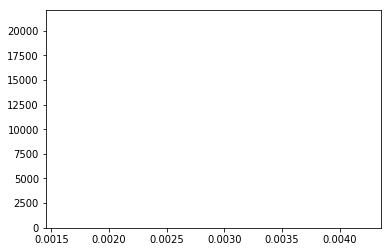

In [24]:
specgram(accent_data2["features"][()][:, :1].T, Fs=44100)

In [ ]:
['usa',
'china',
'uk',
'india',
'canada',
'south korea',
'brazil',
'belgium',
'turkey',
'poland',
'australia',
'saudi arabia',
'germany',
'italy',
'ethiopia',
'russia',
'france',
'japan',
'macedonia',
'philippines']

In [42]:
list(accent_data["country_names"][()])

['usa',
 'china',
 'uk',
 'india',
 'canada',
 'south korea',
 'brazil',
 'belgium',
 'turkey',
 'poland',
 'australia',
 'saudi arabia',
 'germany',
 'italy',
 'ethiopia',
 'russia',
 'france',
 'japan',
 'macedonia',
 'philippines']

In [109]:
accent_data["label_names"][()]

array(['afghanistan', 'albania', 'algeria', 'andorra', 'angola',
       'antigua and barbuda', 'argentina', 'armenia', 'australia',
       'austria', 'azerbaijan', 'bahrain', 'bangladesh', 'barbados',
       'belarus', 'belgium', 'belize', 'benin', 'bolivia', 'bosnia',
       'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria',
       'burkina faso', 'burundi', 'cambodia', 'cameroon', 'canada',
       'chad', 'chile', 'china', 'colombia', 'costa rica', 'croatia',
       'cuba', 'curacao', 'cyprus', 'czech republic',
       'democratic republic of congo', 'denmark', 'dominican republic',
       'ecuador', 'egypt', 'el salvador', 'equatorial guinea', 'eritrea',
       'estonia', 'ethiopia', 'faroe islands',
       'federated states of micronesia', 'fiji', 'finland', 'france',
       'gabon', 'germany', 'ghana', 'greece', 'guatemala', 'guinea',
       'guyana', 'haiti', 'honduras', 'hungary', 'iceland', 'india',
       'indonesia', 'iran', 'iraq', 'ireland', 'isle of man', 'israel'

In [127]:
np.where(accent_data["label_names"][()]=='australia')

(array([8]),)

In [110]:
australia_onehot=np.zeros(accent_data["label_names"].shape)
australia_onehot[np.where(accent_data["label_names"][()]=='australia')]=1

In [129]:
australia_onehot

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [132]:
np.tile(australia_onehot, (accent_data2["features"].shape[0], 1)).shape

(1757, 177)

In [162]:
accent_data["train"]["features"].shape[1]

42

In [158]:
print(len(accent_data2["feature_names"][()]))

42


In [49]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def init_bias(shape):
    return tf.Variable(tf.ones(shape))

In [50]:
def fully_connected_model(params, MODE, data):
    
    num_hidden_layers=1
    hidden_layer_size, learning_rate, minibatch_size, epoch = params
    
    input_layer_size=30
    output_layer_size=177

    x = tf.placeholder(tf.float32, [None, input_layer_size])
    
    W1 = init_weights([input_layer_size, hidden_layer_size])
    b1 = init_bias([hidden_layer_size])
    
    W2 = init_weights([hidden_layer_size, output_layer_size])
    b2 = init_bias([output_layer_size])
    
    h1 = tf.nn.tanh(tf.matmul(x, W1) + b1)
    y = tf.nn.softmax(tf.matmul(h1, W2) + b2)


    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, output_layer_size])
    
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    tf.reset_default_graph()
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    
    #sess.run(init)
    # Train
    dataset = tf.data.Dataset.from_tensor_slices((data["train"]["features"], data["train"]["labels"]))
    dataset = dataset.shuffle(buffer_size=10000)
    dataset = dataset.batch(minibatch_size)

    iterator = dataset.make_initializable_iterator()
    next_batch = iterator.get_next()
    
    for i in range(epoch):
        sess.run(iterator.initializer)
        while True:
            try:
                batch_xs, batch_ys = sess.run(next_batch)
                assert batch_xs.shape[0] == batch_ys.shape[0]
                #print(batch_ys.eval().shape[0])
                sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
                #acc, loss=sess.run([accuracy, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
                #print("Train Iteration: {}, Loss: {}, Accuracy: {}".format(i, loss, acc))
            except tf.errors.OutOfRangeError:
                break

        
    if(MODE=="Tune"):
        return(sess.run([accuracy, cross_entropy], feed_dict={x: data["validation"]["features"], y_: data["validation"]["labels"]}))
    elif(MODE=="Test"):
        return(sess.run([accuracy, cross_entropy], feed_dict={x: data["test"]["features"], y_: data["test"]["labels"]}))

In [66]:
def mtl_model(features, labels, mode, params):
    
    input_size=int(features.shape[1])
    
    lr=int(params['learning_rate'])
    hidden_layer_1_size=int(params['hidden_1_size'])
    
    output_size=20
    
    X = tf.cast(features, tf.float32)
    Y = labels
    

    hidden_layer_1_weights = init_weights([input_size, hidden_layer_1_size])
    output_layer_weights = init_weights([hidden_layer_1_size, output_size])
    
    hidden_layer_1_bias = init_bias([hidden_layer_1_size])
    output_layer_bias = init_bias([output_size])
    
    # Construct the Layers with RELU Activations
    #'''
    hidden_layer_1 = tf.nn.relu(tf.matmul(X,hidden_layer_1_weights)+hidden_layer_1_bias)
    output_layer = tf.nn.softmax(tf.matmul(hidden_layer_1,output_layer_weights)+output_layer_bias)
    
     
    Y_hat=output_layer
    
    Y=tf.one_hot(Y, 20)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=Y_hat)
    
    accuracy, acc_up = tf.metrics.accuracy(Y, Y_hat, name="accuracy")
    
    (fp, fp_up), (tp, tp_up), (tn, tn_up), (fn, fn_up)=tf.metrics.false_positives(Y, Y_hat), tf.metrics.true_positives(Y, Y_hat), tf.metrics.true_negatives(Y, Y_hat), tf.metrics.false_negatives(Y, Y_hat)
    
    sensitivity, specificity, precision = tf.div(tp, tf.add(tp, fn)), tf.div(tn, tf.add(tn, fp)), tf.div(tp, tf.add(tp, fp))
    
    # Balanced accuracy is a more fair replacement for the naive accuracy:
    BA = tf.div(tf.add(sensitivity, specificity), 2)
    
    Y_updates=tf.group(tp_up, tn_up, fp_up, fn_up)
    
    # Precision:
    # Beware from this metric, since it may be too sensitive to rare labels.
    # In the ExtraSensory Dataset, there is large skew among the positive and negative classes,
    # and for each label the pos/neg ratio is different.
    # This can cause undesirable and misleading results when averaging precision across different labels.
    metrics={
            "accuracy": (accuracy, acc_up),
            "sensitivity":(sensitivity, Y_updates),
            "specificity":(specificity, Y_updates),
            "precision":(precision, Y_updates),
            "balanced_accuracy":(BA, Y_updates),
        }
    

    # Calculate Loss
    Y_Loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(onehot_labels=Y, logits=output_layer))
    
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
    optimizer = tf.train.AdamOptimizer(learning_rate=lr)
    #optimizer=tf.train.MomentumOptimizer(learning_rate=lr, momentum=0.5)
    
    train_step = optimizer.minimize(loss=Y_Loss, global_step=tf.train.get_global_step())
   
    
    logging_hook = tf.train.LoggingTensorHook({
            "accuracy": acc_up,
            "sensitivity":sensitivity,
            "specificity":specificity,
            "precision":precision,
            "balanced_accuracy":BA,
        }, every_n_iter=10000)
    
  
    if mode == tf.estimator.ModeKeys.TRAIN:
         return tf.estimator.EstimatorSpec(mode=mode, loss=Y_Loss, train_op=train_step, training_hooks = [logging_hook])
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=Y_Loss, eval_metric_ops=metrics)
    

In [18]:
hidden_layer_sizes=[50,100,200]
learning_rates=[0.1, 1e-3, 1e-5, 1e-7]
minibatch_sizes=[128, 256, 512, 1024]
epochs=[10, 20, 50]
hyperparameters = [hidden_layer_sizes,learning_rates, minibatch_sizes, epochs]
all_parameter_combinations=list(itertools.product(*hyperparameters))

In [163]:
my_feature_columns = []
for key in accent_data2["feature_names"][()]:
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
my_feature_columns

[_NumericColumn(key='mfcc0', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='mfcc9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),


In [30]:
def train_and_eval(params):
    
    hidden_layer_size, learning_rate, minibatch_size, num_epoch = parameter_combo
    '''mtl_classifier = tf.estimator.Estimator(model_fn=mtl_model, params=
       {
           "learning_rate":learning_rate,
           "hidden_1_size":hidden_layer_size,
       }, model_dir="accent_classifier_model", config=tf.estimator.RunConfig().replace(save_summary_steps=10000))'''
    my_feature_columns = []
    for key in accent_data["feature_names"][()]:
        my_feature_columns.append(tf.feature_column.numeric_column(key=key))

    mtl_classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns,
                                      hidden_units=[hidden_layer_size],
                                      n_classes=20,
                                      model_dir="predefined_classifier")

    #tf.global_variables_initializer().run()
    input_x={}
    for i, val in enumerate(accent_data["train"]["features"][()].T):
        input_x[accent_data["feature_names"][()][i]]=val
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x=input_x,
    y=accent_data["train"]["country"][()],
    batch_size=minibatch_size,
    num_epochs=num_epoch,
    shuffle=True)

    mtl_classifier.train(input_fn=train_input_fn)
    #train_spec=tf.estimator.TrainSpec(input_fn=train_input_fn,max_steps=50000)
    input_x={}
    for i, val in enumerate(accent_data["validation"]["features"][()].T):
        input_x[accent_data["feature_names"][()][i]]=val
    validation_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=input_x,
        y=accent_data["validation"]["country"][()],
        shuffle=False)

    #val_spec=tf.estimator.EvalSpec(input_fn=validation_input_fn,steps=epoch)
    
    val_res=mtl_classifier.evaluate(input_fn=validation_input_fn)
    #tf.reset_default_graph()
    
    return(val_res, mtl_classifier)

In [24]:
def test_predict(classifier):
    #classifier = tf.estimator.Estimator(model_fn=mtl_model, model_dir="accent_classifier_model")
    
    input_x={}
    for i, val in enumerate(accent_data2["features"][()].T):
        input_x[accent_data["feature_names"][()][i]]=val
    test_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=input_x,
        shuffle=False)
    #val_spec=tf.estimator.EvalSpec(input_fn=validation_input_fn,steps=epoch)
    prediction=classifier.predict(input_fn=test_input_fn)
    #(prediction)
    for y_hat in prediction:
        print(y_hat)
        
    return results

In [59]:
def train_and_eval_orig(params):
    
    hidden_layer_size, learning_rate, minibatch_size, num_epoch = parameter_combo
    mtl_classifier = tf.estimator.Estimator(model_fn=mtl_model, params=
       {
           "learning_rate":learning_rate,
           "hidden_1_size":hidden_layer_size,
       }, model_dir="accent_classifier_model_FC", config=tf.estimator.RunConfig().replace(save_summary_steps=10000))
    
    #tf.global_variables_initializer().run()
    
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x=accent_data["train"]["features"][()],
    y=accent_data["train"]["country"][()],
    batch_size=minibatch_size,
    num_epochs=num_epoch,
    shuffle=True)

    mtl_classifier.train(input_fn=train_input_fn)
    #train_spec=tf.estimator.TrainSpec(input_fn=train_input_fn,max_steps=50000)
    
    validation_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=accent_data["validation"]["features"][()],
        y=accent_data["validation"]["country"][()],
        shuffle=True)

    #val_spec=tf.estimator.EvalSpec(input_fn=validation_input_fn,steps=epoch)
    
    val_res=mtl_classifier.evaluate(input_fn=validation_input_fn)
    #tf.reset_default_graph()
    
    return val_res

In [67]:
hidden_layer_size, learning_rate, minibatch_size, num_epoch = (300, 1e-4, 64, 10)
parameter_combo=(hidden_layer_size, learning_rate, minibatch_size, num_epoch)
res, classifier=train_and_eval_orig(parameter_combo)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6cd7b00510>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': 'accent_classifier_model_FC', '_save_summary_steps': 10000}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from accent_classifier_model_FC/model.ckpt-12985
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12986 into accent_classifier_mo

INFO:tensorflow:loss = 3.0479145, step = 20086 (0.111 sec)
INFO:tensorflow:global_step/sec: 795.127
INFO:tensorflow:loss = 3.0560389, step = 20186 (0.126 sec)
INFO:tensorflow:global_step/sec: 792.94
INFO:tensorflow:loss = 3.0487406, step = 20286 (0.126 sec)
INFO:tensorflow:global_step/sec: 822.259
INFO:tensorflow:loss = 3.0383527, step = 20386 (0.122 sec)
INFO:tensorflow:global_step/sec: 814.213
INFO:tensorflow:loss = 3.035367, step = 20486 (0.123 sec)
INFO:tensorflow:global_step/sec: 831.753
INFO:tensorflow:loss = 3.037493, step = 20586 (0.121 sec)
INFO:tensorflow:global_step/sec: 835.973
INFO:tensorflow:loss = 3.0423694, step = 20686 (0.119 sec)
INFO:tensorflow:global_step/sec: 820.48
INFO:tensorflow:loss = 3.0026526, step = 20786 (0.121 sec)
INFO:tensorflow:global_step/sec: 846.238
INFO:tensorflow:loss = 3.035573, step = 20886 (0.120 sec)
INFO:tensorflow:global_step/sec: 828.033
INFO:tensorflow:loss = 3.0484776, step = 20986 (0.119 sec)
INFO:tensorflow:global_step/sec: 830.952
INFO:

INFO:tensorflow:global_step/sec: 863.246
INFO:tensorflow:loss = 3.0467892, step = 28286 (0.116 sec)
INFO:tensorflow:global_step/sec: 764.801
INFO:tensorflow:loss = 3.0467753, step = 28386 (0.131 sec)
INFO:tensorflow:global_step/sec: 822.442
INFO:tensorflow:loss = 3.033341, step = 28486 (0.121 sec)
INFO:tensorflow:global_step/sec: 817.863
INFO:tensorflow:loss = 3.0439749, step = 28586 (0.122 sec)
INFO:tensorflow:global_step/sec: 809.205
INFO:tensorflow:loss = 3.0219502, step = 28686 (0.124 sec)
INFO:tensorflow:global_step/sec: 820.015
INFO:tensorflow:loss = 3.048615, step = 28786 (0.121 sec)
INFO:tensorflow:global_step/sec: 858.481
INFO:tensorflow:loss = 3.0487099, step = 28886 (0.117 sec)
INFO:tensorflow:global_step/sec: 847.219
INFO:tensorflow:loss = 3.040937, step = 28986 (0.118 sec)
INFO:tensorflow:global_step/sec: 799.578
INFO:tensorflow:loss = 2.7506118, step = 29086 (0.125 sec)
INFO:tensorflow:global_step/sec: 852.464
INFO:tensorflow:loss = 3.0490704, step = 29186 (0.117 sec)
INF

INFO:tensorflow:global_step/sec: 928.763
INFO:tensorflow:loss = 3.047618, step = 36386 (0.108 sec)
INFO:tensorflow:global_step/sec: 891.862
INFO:tensorflow:loss = 3.0180123, step = 36486 (0.112 sec)
INFO:tensorflow:global_step/sec: 903.407
INFO:tensorflow:loss = 3.0308805, step = 36586 (0.111 sec)
INFO:tensorflow:global_step/sec: 932.053
INFO:tensorflow:loss = 3.0424297, step = 36686 (0.107 sec)
INFO:tensorflow:global_step/sec: 845.237
INFO:tensorflow:loss = 3.0402935, step = 36786 (0.119 sec)
INFO:tensorflow:global_step/sec: 844.295
INFO:tensorflow:loss = 3.050701, step = 36886 (0.118 sec)
INFO:tensorflow:global_step/sec: 868.373
INFO:tensorflow:loss = 3.0514536, step = 36986 (0.115 sec)
INFO:tensorflow:global_step/sec: 919.828
INFO:tensorflow:loss = 3.0354044, step = 37086 (0.109 sec)
INFO:tensorflow:global_step/sec: 931.401
INFO:tensorflow:loss = 3.0533118, step = 37186 (0.107 sec)
INFO:tensorflow:global_step/sec: 937.929
INFO:tensorflow:loss = 3.0429382, step = 37286 (0.107 sec)
IN

INFO:tensorflow:global_step/sec: 916.674
INFO:tensorflow:loss = 3.0368629, step = 44486 (0.109 sec)
INFO:tensorflow:global_step/sec: 887.556
INFO:tensorflow:loss = 3.049433, step = 44586 (0.113 sec)
INFO:tensorflow:global_step/sec: 887.618
INFO:tensorflow:loss = 3.0381536, step = 44686 (0.112 sec)
INFO:tensorflow:global_step/sec: 927.344
INFO:tensorflow:loss = 3.0365272, step = 44786 (0.108 sec)
INFO:tensorflow:global_step/sec: 928.177
INFO:tensorflow:loss = 3.03363, step = 44886 (0.108 sec)
INFO:tensorflow:global_step/sec: 945.617
INFO:tensorflow:loss = 3.0373335, step = 44986 (0.106 sec)
INFO:tensorflow:global_step/sec: 940.442
INFO:tensorflow:loss = 3.0293355, step = 45086 (0.106 sec)
INFO:tensorflow:global_step/sec: 943.227
INFO:tensorflow:loss = 3.0330017, step = 45186 (0.106 sec)
INFO:tensorflow:global_step/sec: 912.509
INFO:tensorflow:loss = 3.042792, step = 45286 (0.109 sec)
INFO:tensorflow:global_step/sec: 949.883
INFO:tensorflow:loss = 3.0339665, step = 45386 (0.105 sec)
INFO

INFO:tensorflow:loss = 3.0483623, step = 52686 (0.112 sec)
INFO:tensorflow:global_step/sec: 909.133
INFO:tensorflow:loss = 3.0302482, step = 52786 (0.110 sec)
INFO:tensorflow:global_step/sec: 931.037
INFO:tensorflow:loss = 3.0304637, step = 52886 (0.107 sec)
INFO:tensorflow:global_step/sec: 911.005
INFO:tensorflow:loss = 2.8657107, step = 52986 (0.110 sec)
INFO:tensorflow:balanced_accuracy = nan, sensitivity = nan, specificity = nan, precision = nan, accuracy = 0.0 (10.880 sec)
INFO:tensorflow:global_step/sec: 918.83
INFO:tensorflow:loss = 3.0522766, step = 53086 (0.109 sec)
INFO:tensorflow:global_step/sec: 875.872
INFO:tensorflow:loss = 3.0519032, step = 53186 (0.114 sec)
INFO:tensorflow:global_step/sec: 882.37
INFO:tensorflow:loss = 3.0144827, step = 53286 (0.113 sec)
INFO:tensorflow:global_step/sec: 856.935
INFO:tensorflow:loss = 3.0432703, step = 53386 (0.116 sec)
INFO:tensorflow:global_step/sec: 914.579
INFO:tensorflow:loss = 3.0535748, step = 53486 (0.109 sec)
INFO:tensorflow:glo

INFO:tensorflow:loss = 3.0423098, step = 60786 (0.114 sec)
INFO:tensorflow:global_step/sec: 895.239
INFO:tensorflow:loss = 3.050109, step = 60886 (0.112 sec)
INFO:tensorflow:global_step/sec: 919.582
INFO:tensorflow:loss = 3.0317507, step = 60986 (0.109 sec)
INFO:tensorflow:global_step/sec: 887.454
INFO:tensorflow:loss = 3.0339787, step = 61086 (0.113 sec)
INFO:tensorflow:global_step/sec: 934.283
INFO:tensorflow:loss = 3.0451756, step = 61186 (0.107 sec)
INFO:tensorflow:global_step/sec: 928.736
INFO:tensorflow:loss = 2.7036223, step = 61286 (0.108 sec)
INFO:tensorflow:global_step/sec: 940.267
INFO:tensorflow:loss = 3.0291533, step = 61386 (0.106 sec)
INFO:tensorflow:global_step/sec: 946.458
INFO:tensorflow:loss = 3.028963, step = 61486 (0.106 sec)
INFO:tensorflow:global_step/sec: 956.307
INFO:tensorflow:loss = 3.037136, step = 61586 (0.105 sec)
INFO:tensorflow:global_step/sec: 954.563
INFO:tensorflow:loss = 3.0436513, step = 61686 (0.105 sec)
INFO:tensorflow:global_step/sec: 905.6
INFO:

INFO:tensorflow:global_step/sec: 903.221
INFO:tensorflow:loss = 3.0348034, step = 68986 (0.111 sec)
INFO:tensorflow:global_step/sec: 927.997
INFO:tensorflow:loss = 3.0494275, step = 69086 (0.108 sec)
INFO:tensorflow:global_step/sec: 941.016
INFO:tensorflow:loss = 3.0463233, step = 69186 (0.107 sec)
INFO:tensorflow:global_step/sec: 911.07
INFO:tensorflow:loss = 3.0348277, step = 69286 (0.109 sec)
INFO:tensorflow:global_step/sec: 947.356
INFO:tensorflow:loss = 3.0308554, step = 69386 (0.106 sec)
INFO:tensorflow:global_step/sec: 936.971
INFO:tensorflow:loss = 3.0372863, step = 69486 (0.107 sec)
INFO:tensorflow:global_step/sec: 929.991
INFO:tensorflow:loss = 3.0366955, step = 69586 (0.107 sec)
INFO:tensorflow:global_step/sec: 955.118
INFO:tensorflow:loss = 3.0365782, step = 69686 (0.105 sec)
INFO:tensorflow:global_step/sec: 942.472
INFO:tensorflow:loss = 3.0487084, step = 69786 (0.106 sec)
INFO:tensorflow:global_step/sec: 902.144
INFO:tensorflow:loss = 3.0468268, step = 69886 (0.111 sec)
I

INFO:tensorflow:global_step/sec: 936.705
INFO:tensorflow:loss = 3.0518203, step = 77086 (0.107 sec)
INFO:tensorflow:global_step/sec: 932.785
INFO:tensorflow:loss = 2.927225, step = 77186 (0.107 sec)
INFO:tensorflow:global_step/sec: 951.24
INFO:tensorflow:loss = 3.0483005, step = 77286 (0.106 sec)
INFO:tensorflow:global_step/sec: 934.57
INFO:tensorflow:loss = 3.0522122, step = 77386 (0.107 sec)
INFO:tensorflow:global_step/sec: 921.914
INFO:tensorflow:loss = 3.05368, step = 77486 (0.109 sec)
INFO:tensorflow:global_step/sec: 919.828
INFO:tensorflow:loss = 3.0520391, step = 77586 (0.109 sec)
INFO:tensorflow:global_step/sec: 904.305
INFO:tensorflow:loss = 3.0525374, step = 77686 (0.111 sec)
INFO:tensorflow:global_step/sec: 878.195
INFO:tensorflow:loss = 3.0479827, step = 77786 (0.114 sec)
INFO:tensorflow:global_step/sec: 947.688
INFO:tensorflow:loss = 3.0289176, step = 77886 (0.106 sec)
INFO:tensorflow:global_step/sec: 945.752
INFO:tensorflow:loss = 3.0122037, step = 77986 (0.106 sec)
INFO:

INFO:tensorflow:global_step/sec: 904.936
INFO:tensorflow:loss = 2.937708, step = 85186 (0.111 sec)
INFO:tensorflow:global_step/sec: 907.854
INFO:tensorflow:loss = 3.030694, step = 85286 (0.110 sec)
INFO:tensorflow:global_step/sec: 930.649
INFO:tensorflow:loss = 3.0417747, step = 85386 (0.107 sec)
INFO:tensorflow:global_step/sec: 925.394
INFO:tensorflow:loss = 3.032444, step = 85486 (0.108 sec)
INFO:tensorflow:global_step/sec: 933.131
INFO:tensorflow:loss = 3.048541, step = 85586 (0.107 sec)
INFO:tensorflow:global_step/sec: 946.629
INFO:tensorflow:loss = 3.0468073, step = 85686 (0.106 sec)
INFO:tensorflow:global_step/sec: 854.819
INFO:tensorflow:loss = 3.05228, step = 85786 (0.117 sec)
INFO:tensorflow:global_step/sec: 770.308
INFO:tensorflow:loss = 3.040276, step = 85886 (0.130 sec)
INFO:tensorflow:global_step/sec: 760.116
INFO:tensorflow:loss = 3.03679, step = 85986 (0.131 sec)
INFO:tensorflow:global_step/sec: 811.741
INFO:tensorflow:loss = 3.0406065, step = 86086 (0.123 sec)
INFO:tens

INFO:tensorflow:loss = 3.0241973, step = 93286 (0.114 sec)
INFO:tensorflow:global_step/sec: 899.183
INFO:tensorflow:loss = 3.026262, step = 93386 (0.111 sec)
INFO:tensorflow:global_step/sec: 921.71
INFO:tensorflow:loss = 3.0388126, step = 93486 (0.109 sec)
INFO:tensorflow:global_step/sec: 893.879
INFO:tensorflow:loss = 3.0470433, step = 93586 (0.112 sec)
INFO:tensorflow:global_step/sec: 917.01
INFO:tensorflow:loss = 3.0288913, step = 93686 (0.109 sec)
INFO:tensorflow:global_step/sec: 930.18
INFO:tensorflow:loss = 2.948964, step = 93786 (0.107 sec)
INFO:tensorflow:global_step/sec: 884.44
INFO:tensorflow:loss = 2.9798112, step = 93886 (0.113 sec)
INFO:tensorflow:global_step/sec: 900.819
INFO:tensorflow:loss = 3.0307672, step = 93986 (0.111 sec)
INFO:tensorflow:global_step/sec: 872.251
INFO:tensorflow:loss = 3.03047, step = 94086 (0.114 sec)
INFO:tensorflow:global_step/sec: 936.084
INFO:tensorflow:loss = 3.0324128, step = 94186 (0.107 sec)
INFO:tensorflow:global_step/sec: 945.905
INFO:ten

INFO:tensorflow:global_step/sec: 869.392
INFO:tensorflow:loss = 3.051071, step = 101586 (0.115 sec)
INFO:tensorflow:global_step/sec: 901.811
INFO:tensorflow:loss = 3.0415225, step = 101686 (0.111 sec)
INFO:tensorflow:global_step/sec: 775.452
INFO:tensorflow:loss = 3.0321999, step = 101786 (0.129 sec)
INFO:tensorflow:global_step/sec: 632.351
INFO:tensorflow:loss = 3.0334687, step = 101886 (0.158 sec)
INFO:tensorflow:global_step/sec: 633.191
INFO:tensorflow:loss = 3.0381048, step = 101986 (0.158 sec)
INFO:tensorflow:global_step/sec: 822.992
INFO:tensorflow:loss = 3.050725, step = 102086 (0.121 sec)
INFO:tensorflow:global_step/sec: 879.707
INFO:tensorflow:loss = 3.0539632, step = 102186 (0.113 sec)
INFO:tensorflow:global_step/sec: 933.777
INFO:tensorflow:loss = 3.0210626, step = 102286 (0.107 sec)
INFO:tensorflow:global_step/sec: 872.289
INFO:tensorflow:loss = 3.040372, step = 102386 (0.114 sec)
INFO:tensorflow:global_step/sec: 953.006
INFO:tensorflow:loss = 3.0364804, step = 102486 (0.10

INFO:tensorflow:loss = 3.051828, step = 109586 (0.124 sec)
INFO:tensorflow:global_step/sec: 961.491
INFO:tensorflow:loss = 3.055471, step = 109686 (0.105 sec)
INFO:tensorflow:global_step/sec: 933.742
INFO:tensorflow:loss = 3.0207915, step = 109786 (0.106 sec)
INFO:tensorflow:global_step/sec: 956.817
INFO:tensorflow:loss = 3.0359664, step = 109886 (0.105 sec)
INFO:tensorflow:global_step/sec: 981.096
INFO:tensorflow:loss = 3.0361469, step = 109986 (0.102 sec)
INFO:tensorflow:global_step/sec: 860.437
INFO:tensorflow:loss = 3.0374396, step = 110086 (0.116 sec)
INFO:tensorflow:global_step/sec: 938.588
INFO:tensorflow:loss = 3.0386415, step = 110186 (0.106 sec)
INFO:tensorflow:global_step/sec: 947.238
INFO:tensorflow:loss = 3.044069, step = 110286 (0.106 sec)
INFO:tensorflow:global_step/sec: 966.904
INFO:tensorflow:loss = 3.0487804, step = 110386 (0.104 sec)
INFO:tensorflow:global_step/sec: 939.654
INFO:tensorflow:loss = 3.0287437, step = 110486 (0.107 sec)
INFO:tensorflow:global_step/sec: 9

INFO:tensorflow:global_step/sec: 940.151
INFO:tensorflow:loss = 2.7040346, step = 117686 (0.106 sec)
INFO:tensorflow:global_step/sec: 926.5
INFO:tensorflow:loss = 3.0369265, step = 117786 (0.108 sec)
INFO:tensorflow:global_step/sec: 939.081
INFO:tensorflow:loss = 3.0220225, step = 117886 (0.107 sec)
INFO:tensorflow:global_step/sec: 954.781
INFO:tensorflow:loss = 3.01301, step = 117986 (0.105 sec)
INFO:tensorflow:global_step/sec: 938.289
INFO:tensorflow:loss = 3.0243444, step = 118086 (0.107 sec)
INFO:tensorflow:global_step/sec: 932.932
INFO:tensorflow:loss = 3.046711, step = 118186 (0.107 sec)
INFO:tensorflow:global_step/sec: 977.823
INFO:tensorflow:loss = 3.030586, step = 118286 (0.102 sec)
INFO:tensorflow:global_step/sec: 961.223
INFO:tensorflow:loss = 3.036232, step = 118386 (0.104 sec)
INFO:tensorflow:global_step/sec: 914.061
INFO:tensorflow:loss = 3.052974, step = 118486 (0.109 sec)
INFO:tensorflow:global_step/sec: 978.464
INFO:tensorflow:loss = 3.029193, step = 118586 (0.102 sec)

INFO:tensorflow:loss = 3.0379481, step = 125686 (0.105 sec)
INFO:tensorflow:global_step/sec: 926.355
INFO:tensorflow:loss = 3.03787, step = 125786 (0.108 sec)
INFO:tensorflow:global_step/sec: 970.356
INFO:tensorflow:loss = 3.0406516, step = 125886 (0.103 sec)
INFO:tensorflow:global_step/sec: 940.176
INFO:tensorflow:loss = 3.0473685, step = 125986 (0.106 sec)
INFO:tensorflow:global_step/sec: 888.788
INFO:tensorflow:loss = 3.041625, step = 126086 (0.113 sec)
INFO:tensorflow:global_step/sec: 897.625
INFO:tensorflow:loss = 3.0475078, step = 126186 (0.111 sec)
INFO:tensorflow:global_step/sec: 916.826
INFO:tensorflow:loss = 3.042055, step = 126286 (0.109 sec)
INFO:tensorflow:global_step/sec: 943.966
INFO:tensorflow:loss = 3.0360103, step = 126386 (0.106 sec)
INFO:tensorflow:global_step/sec: 914.061
INFO:tensorflow:loss = 3.0394654, step = 126486 (0.109 sec)
INFO:tensorflow:global_step/sec: 952.154
INFO:tensorflow:loss = 3.0306911, step = 126586 (0.105 sec)
INFO:tensorflow:global_step/sec: 93

INFO:tensorflow:global_step/sec: 970.91
INFO:tensorflow:loss = 3.03964, step = 133786 (0.103 sec)
INFO:tensorflow:global_step/sec: 905.584
INFO:tensorflow:loss = 3.0405452, step = 133886 (0.110 sec)
INFO:tensorflow:global_step/sec: 975.104
INFO:tensorflow:loss = 3.033125, step = 133986 (0.103 sec)
INFO:tensorflow:global_step/sec: 928.66
INFO:tensorflow:loss = 3.040902, step = 134086 (0.107 sec)
INFO:tensorflow:global_step/sec: 940.026
INFO:tensorflow:loss = 3.0373616, step = 134186 (0.106 sec)
INFO:tensorflow:global_step/sec: 937.629
INFO:tensorflow:loss = 3.0408375, step = 134286 (0.107 sec)
INFO:tensorflow:global_step/sec: 935.21
INFO:tensorflow:loss = 3.0316765, step = 134386 (0.107 sec)
INFO:tensorflow:global_step/sec: 922.058
INFO:tensorflow:loss = 3.0345511, step = 134486 (0.109 sec)
INFO:tensorflow:global_step/sec: 919.862
INFO:tensorflow:loss = 3.0287883, step = 134586 (0.108 sec)
INFO:tensorflow:global_step/sec: 934.868
INFO:tensorflow:loss = 3.0274503, step = 134686 (0.107 se

INFO:tensorflow:global_step/sec: 955.292
INFO:tensorflow:loss = 3.030822, step = 141986 (0.105 sec)
INFO:tensorflow:global_step/sec: 941.079
INFO:tensorflow:loss = 3.0394127, step = 142086 (0.106 sec)
INFO:tensorflow:global_step/sec: 949.685
INFO:tensorflow:loss = 3.0207448, step = 142186 (0.105 sec)
INFO:tensorflow:global_step/sec: 950.779
INFO:tensorflow:loss = 3.0247757, step = 142286 (0.105 sec)
INFO:tensorflow:global_step/sec: 929.723
INFO:tensorflow:loss = 3.0393126, step = 142386 (0.108 sec)
INFO:tensorflow:global_step/sec: 944.404
INFO:tensorflow:loss = 3.02453, step = 142486 (0.106 sec)
INFO:tensorflow:global_step/sec: 953.342
INFO:tensorflow:loss = 3.0291324, step = 142586 (0.105 sec)
INFO:tensorflow:global_step/sec: 951.938
INFO:tensorflow:loss = 3.0396554, step = 142686 (0.105 sec)
INFO:tensorflow:global_step/sec: 936.645
INFO:tensorflow:loss = 3.0398989, step = 142786 (0.107 sec)
INFO:tensorflow:global_step/sec: 940.284
INFO:tensorflow:loss = 3.0368197, step = 142886 (0.10

INFO:tensorflow:loss = 3.0382214, step = 149986 (0.106 sec)
INFO:tensorflow:global_step/sec: 933.071
INFO:tensorflow:loss = 3.0084934, step = 150086 (0.107 sec)
INFO:tensorflow:global_step/sec: 923.225
INFO:tensorflow:loss = 3.0147152, step = 150186 (0.108 sec)
INFO:tensorflow:global_step/sec: 903.929
INFO:tensorflow:loss = 3.0513463, step = 150286 (0.111 sec)
INFO:tensorflow:global_step/sec: 877.862
INFO:tensorflow:loss = 3.031093, step = 150386 (0.114 sec)
INFO:tensorflow:global_step/sec: 930.001
INFO:tensorflow:loss = 3.0451014, step = 150486 (0.107 sec)
INFO:tensorflow:global_step/sec: 927.057
INFO:tensorflow:loss = 3.0395937, step = 150586 (0.108 sec)
INFO:tensorflow:global_step/sec: 980.152
INFO:tensorflow:loss = 2.9943695, step = 150686 (0.102 sec)
INFO:tensorflow:global_step/sec: 1019.97
INFO:tensorflow:loss = 3.0307145, step = 150786 (0.098 sec)
INFO:tensorflow:global_step/sec: 997.584
INFO:tensorflow:loss = 3.0210276, step = 150886 (0.100 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 957.927
INFO:tensorflow:loss = 3.0331373, step = 158086 (0.104 sec)
INFO:tensorflow:global_step/sec: 943.085
INFO:tensorflow:loss = 3.029654, step = 158186 (0.106 sec)
INFO:tensorflow:global_step/sec: 937.629
INFO:tensorflow:loss = 3.020995, step = 158286 (0.107 sec)
INFO:tensorflow:global_step/sec: 938.632
INFO:tensorflow:loss = 3.0259666, step = 158386 (0.107 sec)
INFO:tensorflow:global_step/sec: 987.615
INFO:tensorflow:loss = 3.0264425, step = 158486 (0.101 sec)
INFO:tensorflow:global_step/sec: 886.612
INFO:tensorflow:loss = 3.0462785, step = 158586 (0.113 sec)
INFO:tensorflow:global_step/sec: 942.036
INFO:tensorflow:loss = 3.031448, step = 158686 (0.106 sec)
INFO:tensorflow:global_step/sec: 982.077
INFO:tensorflow:loss = 3.0406027, step = 158786 (0.102 sec)
INFO:tensorflow:global_step/sec: 945.178
INFO:tensorflow:loss = 3.0265937, step = 158886 (0.106 sec)
INFO:tensorflow:global_step/sec: 928.747
INFO:tensorflow:loss = 3.0366812, step = 158986 (0.10

INFO:tensorflow:loss = 3.0214963, step = 166086 (0.108 sec)
INFO:tensorflow:global_step/sec: 947.212
INFO:tensorflow:loss = 3.0311322, step = 166186 (0.106 sec)
INFO:tensorflow:global_step/sec: 936.62
INFO:tensorflow:loss = 3.028018, step = 166286 (0.107 sec)
INFO:tensorflow:global_step/sec: 972.024
INFO:tensorflow:loss = 3.0298553, step = 166386 (0.103 sec)
INFO:tensorflow:global_step/sec: 960.375
INFO:tensorflow:loss = 3.037126, step = 166486 (0.104 sec)
INFO:tensorflow:global_step/sec: 937.557
INFO:tensorflow:loss = 3.0546205, step = 166586 (0.107 sec)
INFO:tensorflow:global_step/sec: 913.977
INFO:tensorflow:loss = 3.0528688, step = 166686 (0.109 sec)
INFO:tensorflow:global_step/sec: 959.492
INFO:tensorflow:loss = 3.0415769, step = 166786 (0.104 sec)
INFO:tensorflow:global_step/sec: 949.406
INFO:tensorflow:loss = 3.0488122, step = 166886 (0.106 sec)
INFO:tensorflow:global_step/sec: 967.66
INFO:tensorflow:loss = 3.0450068, step = 166986 (0.103 sec)
INFO:tensorflow:global_step/sec: 95

INFO:tensorflow:global_step/sec: 965.306
INFO:tensorflow:loss = 3.0499344, step = 174186 (0.104 sec)
INFO:tensorflow:global_step/sec: 963.78
INFO:tensorflow:loss = 3.0297048, step = 174286 (0.104 sec)
INFO:tensorflow:global_step/sec: 906.718
INFO:tensorflow:loss = 3.0174813, step = 174386 (0.111 sec)
INFO:tensorflow:global_step/sec: 971.563
INFO:tensorflow:loss = 3.0484579, step = 174486 (0.103 sec)
INFO:tensorflow:global_step/sec: 920.387
INFO:tensorflow:loss = 3.0470219, step = 174586 (0.109 sec)
INFO:tensorflow:global_step/sec: 891.233
INFO:tensorflow:loss = 3.0372672, step = 174686 (0.112 sec)
INFO:tensorflow:global_step/sec: 917.086
INFO:tensorflow:loss = 3.0328155, step = 174786 (0.109 sec)
INFO:tensorflow:global_step/sec: 924.805
INFO:tensorflow:loss = 3.0385861, step = 174886 (0.108 sec)
INFO:tensorflow:global_step/sec: 919.169
INFO:tensorflow:loss = 3.0337682, step = 174986 (0.109 sec)
INFO:tensorflow:global_step/sec: 922.831
INFO:tensorflow:loss = 3.0390391, step = 175086 (0.

INFO:tensorflow:loss = 3.0286987, step = 182286 (0.107 sec)
INFO:tensorflow:global_step/sec: 933.863
INFO:tensorflow:loss = 3.0293212, step = 182386 (0.107 sec)
INFO:tensorflow:global_step/sec: 936.233
INFO:tensorflow:loss = 3.048278, step = 182486 (0.107 sec)
INFO:tensorflow:global_step/sec: 939.559
INFO:tensorflow:loss = 3.0240922, step = 182586 (0.106 sec)
INFO:tensorflow:global_step/sec: 971.081
INFO:tensorflow:loss = 3.0167592, step = 182686 (0.103 sec)
INFO:tensorflow:global_step/sec: 969.781
INFO:tensorflow:loss = 3.0283155, step = 182786 (0.103 sec)
INFO:tensorflow:global_step/sec: 895.97
INFO:tensorflow:loss = 3.049376, step = 182886 (0.112 sec)
INFO:tensorflow:global_step/sec: 973.321
INFO:tensorflow:loss = 3.0402699, step = 182986 (0.103 sec)
INFO:tensorflow:balanced_accuracy = nan, sensitivity = nan, specificity = nan, precision = nan, accuracy = 0.0 (10.664 sec)
INFO:tensorflow:global_step/sec: 922.746
INFO:tensorflow:loss = 3.0514863, step = 183086 (0.108 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 941.184
INFO:tensorflow:loss = 3.0444896, step = 190386 (0.106 sec)
INFO:tensorflow:global_step/sec: 944.216
INFO:tensorflow:loss = 3.0517364, step = 190486 (0.106 sec)
INFO:tensorflow:global_step/sec: 922.559
INFO:tensorflow:loss = 3.0440073, step = 190586 (0.108 sec)
INFO:tensorflow:global_step/sec: 946.02
INFO:tensorflow:loss = 3.0486937, step = 190686 (0.106 sec)
INFO:tensorflow:global_step/sec: 949.38
INFO:tensorflow:loss = 3.054625, step = 190786 (0.105 sec)
INFO:tensorflow:global_step/sec: 934.073
INFO:tensorflow:loss = 3.05378, step = 190886 (0.107 sec)
INFO:tensorflow:global_step/sec: 952.299
INFO:tensorflow:loss = 3.0471525, step = 190986 (0.105 sec)
INFO:tensorflow:global_step/sec: 960.303
INFO:tensorflow:loss = 3.0493932, step = 191086 (0.104 sec)
INFO:tensorflow:global_step/sec: 942.47
INFO:tensorflow:loss = 3.0476391, step = 191186 (0.106 sec)
INFO:tensorflow:global_step/sec: 939.029
INFO:tensorflow:loss = 3.0561612, step = 191286 (0.107 s

INFO:tensorflow:loss = 2.6623955, step = 198386 (0.109 sec)
INFO:tensorflow:global_step/sec: 919.465
INFO:tensorflow:loss = 3.0447373, step = 198486 (0.108 sec)
INFO:tensorflow:global_step/sec: 971.052
INFO:tensorflow:loss = 3.0396957, step = 198586 (0.103 sec)
INFO:tensorflow:global_step/sec: 954.527
INFO:tensorflow:loss = 3.035263, step = 198686 (0.105 sec)
INFO:tensorflow:global_step/sec: 916.413
INFO:tensorflow:loss = 3.0441375, step = 198786 (0.109 sec)
INFO:tensorflow:global_step/sec: 921.1
INFO:tensorflow:loss = 3.0439708, step = 198886 (0.109 sec)
INFO:tensorflow:global_step/sec: 955.738
INFO:tensorflow:loss = 3.0321455, step = 198986 (0.105 sec)
INFO:tensorflow:global_step/sec: 959.841
INFO:tensorflow:loss = 3.051557, step = 199086 (0.104 sec)
INFO:tensorflow:global_step/sec: 969.293
INFO:tensorflow:loss = 3.040109, step = 199186 (0.103 sec)
INFO:tensorflow:global_step/sec: 960.791
INFO:tensorflow:loss = 3.0489326, step = 199286 (0.104 sec)
INFO:tensorflow:global_step/sec: 937

INFO:tensorflow:global_step/sec: 967.689
INFO:tensorflow:loss = 3.0329185, step = 206486 (0.104 sec)
INFO:tensorflow:global_step/sec: 944.759
INFO:tensorflow:loss = 3.0398026, step = 206586 (0.106 sec)
INFO:tensorflow:global_step/sec: 952.082
INFO:tensorflow:loss = 3.0345464, step = 206686 (0.105 sec)
INFO:tensorflow:global_step/sec: 946.11
INFO:tensorflow:loss = 3.0481029, step = 206786 (0.106 sec)
INFO:tensorflow:global_step/sec: 931.306
INFO:tensorflow:loss = 3.0500212, step = 206886 (0.107 sec)
INFO:tensorflow:global_step/sec: 944.769
INFO:tensorflow:loss = 3.0341954, step = 206986 (0.106 sec)
INFO:tensorflow:global_step/sec: 949.109
INFO:tensorflow:loss = 3.0452173, step = 207086 (0.105 sec)
INFO:tensorflow:global_step/sec: 950.643
INFO:tensorflow:loss = 3.0301456, step = 207186 (0.105 sec)
INFO:tensorflow:global_step/sec: 935.112
INFO:tensorflow:loss = 3.0415988, step = 207286 (0.107 sec)
INFO:tensorflow:global_step/sec: 961.02
INFO:tensorflow:loss = 3.0149932, step = 207386 (0.1

INFO:tensorflow:loss = 3.0397253, step = 214486 (0.107 sec)
INFO:tensorflow:global_step/sec: 932.505
INFO:tensorflow:loss = 3.0512176, step = 214586 (0.107 sec)
INFO:tensorflow:global_step/sec: 920.928
INFO:tensorflow:loss = 3.049899, step = 214686 (0.108 sec)
INFO:tensorflow:global_step/sec: 920.591
INFO:tensorflow:loss = 3.0501444, step = 214786 (0.109 sec)
INFO:tensorflow:global_step/sec: 912.857
INFO:tensorflow:loss = 3.0464568, step = 214886 (0.109 sec)
INFO:tensorflow:global_step/sec: 931.854
INFO:tensorflow:loss = 3.0523367, step = 214986 (0.107 sec)
INFO:tensorflow:global_step/sec: 924.128
INFO:tensorflow:loss = 3.046896, step = 215086 (0.108 sec)
INFO:tensorflow:global_step/sec: 908.546
INFO:tensorflow:loss = 3.0508506, step = 215186 (0.111 sec)
INFO:tensorflow:global_step/sec: 969.698
INFO:tensorflow:loss = 3.0557032, step = 215286 (0.102 sec)
INFO:tensorflow:global_step/sec: 978.147
INFO:tensorflow:loss = 3.0499701, step = 215386 (0.102 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 934.772
INFO:tensorflow:loss = 3.0311306, step = 222686 (0.107 sec)
INFO:tensorflow:global_step/sec: 950.245
INFO:tensorflow:loss = 3.0283425, step = 222786 (0.105 sec)
INFO:tensorflow:global_step/sec: 949.008
INFO:tensorflow:loss = 3.0429323, step = 222886 (0.105 sec)
INFO:tensorflow:global_step/sec: 932.758
INFO:tensorflow:loss = 3.0482416, step = 222986 (0.107 sec)
INFO:tensorflow:balanced_accuracy = nan, sensitivity = nan, specificity = nan, precision = nan, accuracy = 0.0 (10.608 sec)
INFO:tensorflow:global_step/sec: 939.567
INFO:tensorflow:loss = 3.039857, step = 223086 (0.106 sec)
INFO:tensorflow:global_step/sec: 948.731
INFO:tensorflow:loss = 3.0340862, step = 223186 (0.105 sec)
INFO:tensorflow:global_step/sec: 944.457
INFO:tensorflow:loss = 3.0510168, step = 223286 (0.106 sec)
INFO:tensorflow:global_step/sec: 947.033
INFO:tensorflow:loss = 3.0213718, step = 223386 (0.106 sec)
INFO:tensorflow:global_step/sec: 956.826
INFO:tensorflow:loss = 3.029

INFO:tensorflow:loss = 3.0337524, step = 230686 (0.111 sec)
INFO:tensorflow:global_step/sec: 924.283
INFO:tensorflow:loss = 3.0511808, step = 230786 (0.108 sec)
INFO:tensorflow:global_step/sec: 945.717
INFO:tensorflow:loss = 3.0410378, step = 230886 (0.106 sec)
INFO:tensorflow:global_step/sec: 925.129
INFO:tensorflow:loss = 3.0379276, step = 230986 (0.108 sec)
INFO:tensorflow:global_step/sec: 927.978
INFO:tensorflow:loss = 3.0375967, step = 231086 (0.108 sec)
INFO:tensorflow:global_step/sec: 913.927
INFO:tensorflow:loss = 3.0438344, step = 231186 (0.109 sec)
INFO:tensorflow:global_step/sec: 932.793
INFO:tensorflow:loss = 3.0385375, step = 231286 (0.107 sec)
INFO:tensorflow:global_step/sec: 943.325
INFO:tensorflow:loss = 3.0412822, step = 231386 (0.106 sec)
INFO:tensorflow:global_step/sec: 933.584
INFO:tensorflow:loss = 3.0392368, step = 231486 (0.107 sec)
INFO:tensorflow:global_step/sec: 897.047
INFO:tensorflow:loss = 3.0445342, step = 231586 (0.112 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 921.141
INFO:tensorflow:loss = 3.0481443, step = 238786 (0.109 sec)
INFO:tensorflow:global_step/sec: 902.585
INFO:tensorflow:loss = 3.0467741, step = 238886 (0.111 sec)
INFO:tensorflow:global_step/sec: 928.961
INFO:tensorflow:loss = 3.0510778, step = 238986 (0.108 sec)
INFO:tensorflow:global_step/sec: 927.42
INFO:tensorflow:loss = 3.0520365, step = 239086 (0.108 sec)
INFO:tensorflow:global_step/sec: 960.026
INFO:tensorflow:loss = 3.0535493, step = 239186 (0.105 sec)
INFO:tensorflow:global_step/sec: 959.905
INFO:tensorflow:loss = 3.04583, step = 239286 (0.104 sec)
INFO:tensorflow:global_step/sec: 945.447
INFO:tensorflow:loss = 3.04841, step = 239386 (0.106 sec)
INFO:tensorflow:global_step/sec: 954.909
INFO:tensorflow:loss = 3.0544994, step = 239486 (0.105 sec)
INFO:tensorflow:global_step/sec: 935.717
INFO:tensorflow:loss = 3.0458086, step = 239586 (0.107 sec)
INFO:tensorflow:global_step/sec: 922.756
INFO:tensorflow:loss = 3.0420098, step = 239686 (0.108 

INFO:tensorflow:loss = 3.0514212, step = 246786 (0.107 sec)
INFO:tensorflow:global_step/sec: 921.896
INFO:tensorflow:loss = 3.0383768, step = 246886 (0.109 sec)
INFO:tensorflow:global_step/sec: 939.355
INFO:tensorflow:loss = 3.0540605, step = 246986 (0.106 sec)
INFO:tensorflow:global_step/sec: 932.532
INFO:tensorflow:loss = 3.0355353, step = 247086 (0.107 sec)
INFO:tensorflow:global_step/sec: 940.821
INFO:tensorflow:loss = 3.0501459, step = 247186 (0.106 sec)
INFO:tensorflow:global_step/sec: 923.858
INFO:tensorflow:loss = 3.0406928, step = 247286 (0.108 sec)
INFO:tensorflow:global_step/sec: 906.857
INFO:tensorflow:loss = 3.037808, step = 247386 (0.110 sec)
INFO:tensorflow:global_step/sec: 942.818
INFO:tensorflow:loss = 3.0482333, step = 247486 (0.106 sec)
INFO:tensorflow:global_step/sec: 930.015
INFO:tensorflow:loss = 3.047521, step = 247586 (0.107 sec)
INFO:tensorflow:global_step/sec: 931.697
INFO:tensorflow:loss = 3.0420737, step = 247686 (0.108 sec)
INFO:tensorflow:global_step/sec: 

ValueError: too many values to unpack

In [45]:
my_feature_columns = [tf.feature_column.numeric_column("x", shape=[42])]

mtl_classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns,
                                      hidden_units=[hidden_layer_size],
                                      n_classes=20,
                                      model_dir="predefined_classifier")

#tf.global_variables_initializer().run()
input_x={}
for i, val in enumerate(accent_data["train"]["features"][()].T):
    input_x[accent_data["feature_names"][()][i]]=val
    
train_input_fn = tf.estimator.inputs.numpy_input_fn(
x={"x":accent_data["train"]["features"][()]},
y=np.argmax(accent_data["train"]["country"][()], axis=1),
batch_size=minibatch_size,
num_epochs=num_epoch,
shuffle=True)

mtl_classifier.train(input_fn=train_input_fn)
#train_spec=tf.estimator.TrainSpec(input_fn=train_input_fn,max_steps=50000)
input_x={}
for i, val in enumerate(accent_data["validation"]["features"][()].T):
    input_x[accent_data["feature_names"][()][i]]=val
validation_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x":accent_data["validation"]["features"][()]},
    y=np.argmax(accent_data["validation"]["country"][()], axis=1),
    shuffle=False)

#val_spec=tf.estimator.EvalSpec(input_fn=validation_input_fn,steps=epoch)

val_res=mtl_classifier.evaluate(input_fn=validation_input_fn)
    #tf.reset_default_graph()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6cdb0ec210>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': 'predefined_classifier', '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from predefined_classifier/model.ckpt-2
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3 into pr

KeyboardInterrupt: 

In [23]:
test_predict(classifier)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from predefined_classifier/model.ckpt-12985
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'probabilities': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32), 'logits': array([ -3499.4736  ,   -461.5132  ,   1227.7911  ,  17936.041   ,
         1257.7428  ,    813.2213  ,   -746.15076 ,  -1270.1204  ,
         2300.074   ,   -453.20975 ,     52.662407,    -62.581734,
          445.75446 ,  -3173.4136  ,   1809.1165  ,    831.174   ,
         1623.6052  , -13186.571   ,  -1536.5559  ,   2511.8342  ],
      dtype=float32), 'classes': array(['3'], dtype=object), 'class_ids': array([3])}


Exception AssertionError: AssertionError("Nesting violated for default stack of <class 'tensorflow.python.framework.ops.Graph'> objects",) in <generator object predict at 0x7f6cda009050> ignored


NameError: global name 'r' is not defined

In [99]:
test_predict(classifier)

<function input_fn at 0x7ff1bc6141b8>
<generator object predict at 0x7ff1747ead20>
INFO:tensorflow:Calling model_fn.


ValueError: onehot_labels must not be None.

In [61]:
np.zeros((accent_data2["features"].shape[0], 177)).shape

(1757, 177)

In [ ]:
acc, ba, spec, sens, prec=[],[],[],[],[]
for parameter_combo in all_parameter_combinations:
    validation_results=train_and_eval(parameter_combo)
    for k,v in validation_results.items():
        if k.endswith('balanced_accuracy'):
            ba.append(v)
        elif k.endswith('sensitivity'):
            sens.append(v)
        elif k.endswith('accuracy'):
            acc.append(v)
        elif k.endswith('specificity'):
            spec.append(v)
        elif k.endswith('precision'):
            prec.append(v)
    

In [33]:
acc, ba, spec, sens, prec

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.49794477,
  0.49735552,
  0.49731624,
  0.49743408,
  0.5215154,
  0.5034446,
  0.4984162,
  0.50383747,
  0.49833763,
  0.49873048,
  0.4973948,
  0.4991233,
  0.49794477,
  0.49735552,
  0.49990898,
  0.4976698,
  0.49873048,
  0.51837265],
 [0.99432707,
  0.9943204,
  0.99432,
  0.9943213,
  0.9945934,
  0.9943892,
  0.9943324,
  0.99439365,
  0.9943315,
  0.99433595,
  0.99432087,
  0.99434036,
  0.99432707,
  0.9943204,
  0.99434924,
  0.99432397,
  0.99433595,
  0.99455786],
 [0.0015625,
  0.000390625,
  0.0003125,
  0.000546875,
  0.0484375,
  0.0125,
  0.0025,
  0.01328125,
  0.00234375,
  0.003125,
  0.00046875,
  0.00390625,
  0.0015625,
  0.000390625,
  0.00546875,
  0.001015625,
  0.003125,
  0.0421875],
 [0.0015625,
  0.000390625,
  0.0003125,
  0.000546875,
  0.0484375,
  0.0125,
  0.0025,
  0.01328125,
  0.00234375,
  0.003125,
  0.00046875,


In [ ]:
hidden_layer_sizes=[50,100,200]
learning_rates=[0.1, 1e-3, 1e-5, 1e-7]
minibatch_sizes=[128, 256, 512, 1024]
epochs=[10, 20, 50, 100]
MODE="Tune"
hyperparameters = [hidden_layer_sizes,learning_rates, minibatch_sizes, epochs]
all_parameter_combinations=list(itertools.product(*hyperparameters))
costs=[]
accuracies=[]
for parameter_combo in all_parameter_combinations:
    hidden_layer_size, learning_rate, minibatch_size, num_epoch = parameter_combo
    acc, cost=fully_connected_model(parameter_combo, MODE, accent_data)
    costs.append(cost)
    accuracies.append(acc)
    print("Hidden Layer Size: {}, Learning Rate: {}, Minibatch Size: {}, Number of Epochs: {}, Validation Cost: {}, Validation Accuracy: {}".
      format(hidden_layer_size,learning_rate,minibatch_size,num_epoch,cost,acc))
    
best_params=all_parameter_combinations[np.argmin(costs)]
print("Best Parameters: \n Hidden Layer Size: {}, Learning Rate: {}, Minibatch Size: {}, Number of Epochs: {}".
        format(best_params[0],best_params[1],best_params[2],best_params[3]))
params=best_params

In [179]:
hidden_layer_size, learning_rate, minibatch_size, num_epoch = (30, 1e-4, 64, 10)
params=(hidden_layer_size, learning_rate, minibatch_size, num_epoch)

fully_connected_model(params, "Tune", accent_data)

ValueError: Cannot create a tensor proto whose content is larger than 2GB.

In [4]:
# Assume that each row of `features` corresponds to the same row as `labels`.
assert features.shape[0] == labels.shape[0]

features_placeholder = tf.placeholder(features.dtype, features.shape)
labels_placeholder = tf.placeholder(labels.dtype, labels.shape)

dataset = tf.data.Dataset.from_tensor_slices((features_placeholder, labels_placeholder))
# [Other transformations on `dataset`...]
dataset = ...
iterator = dataset.make_initializable_iterator()

sess.run(iterator.initializer, feed_dict={features_placeholder: features,
                                          labels_placeholder: labels})

dict

In [130]:
a=np.random.uniform(0, 1, (10, 5))
b=np.random.choice([0, 1], (10, 2))

In [132]:
b.shape

(10, 2)

In [143]:
dataset = tf.data.Dataset.from_tensor_slices((a, b))
batched_dataset = dataset.batch(4)

iterator = batched_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

In [144]:
x, y=next_element

In [140]:
sess = tf.InteractiveSession()
print(sess.run(next_element)) 
print(sess.run(next_element))

(array([[0.11267299, 0.18955807, 0.62972145, 0.647367  , 0.5535771 ],
       [0.82763681, 0.41124453, 0.98413425, 0.91787819, 0.25656209],
       [0.75536052, 0.48426921, 0.69060506, 0.03793494, 0.38588012],
       [0.99284611, 0.1507184 , 0.41312696, 0.17764264, 0.59527701]]), array([[1, 1],
       [0, 1],
       [1, 1],
       [1, 1]]))
(array([[0.60430739, 0.70136986, 0.15155032, 0.75425702, 0.8306352 ],
       [0.26226501, 0.19980505, 0.7848273 , 0.21034124, 0.43920207],
       [0.08289559, 0.13835589, 0.21968383, 0.82158866, 0.62319138],
       [0.10658713, 0.03450154, 0.09716551, 0.9689986 , 0.22391613]]), array([[1, 0],
       [1, 1],
       [1, 0],
       [1, 1]]))


In [137]:
dataset

<TensorSliceDataset shapes: ((5,), (2,)), types: (tf.float64, tf.int64)>

# Ishaan is an awesome guy. Stupid programmer but, still good at heart, please don't kill him.

# Pretty please!!! < insert puppy dog face eyes emoji here >

In [89]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3("/home/kavin/Silo/CollegeWork/DL/Project/new testing files/english613.mp3")
sound.export("english613.wav", format="wav")

ImportError: No module named pydub